<a href="https://colab.research.google.com/github/victorviro/Machine-Learning-Python/blob/master/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression

# Table of contents


1. [Introduction](#1)
2. [Logistic regression](#2)
    1. [Probability estimation](#2.1)
    2. [Training and cost function](#2.2)
    3. [Example](#2.3)
    4. [Regularization](#2.4)
3. [Multinomial logistic regression](#3)
    1. [Probability estimation](#3.1)
    2. [Training and cost function](#3.2)
        1. [Parameter fitting](#3.2.1)
    3. [Example](#3.3)

4. [References](#4)





# Introduction <a name="1"></a>

We have seen how we can make predictions using linear regression (notebook [Introduction to linear regression](https://nbviewer.jupyter.org/github/victorviro/ML_algorithms_python/blob/master/Introduction_linear_regression_and_regularized_linear_models.ipynb)). In this section, we will dive deep into the **generalized model of linear regression for classification** instead of prediction.

# Logistic regression <a name="2"></a>

 **Logistic regression** (also called *logit regression*) is a **linear classifier** for binary classification tasks. It calculates the **probability** of two classes between 0 and 1. We can simply classify an observation if it’s probability score is less than 0.5 is classified in class 0 (negative class) otherwise in class 1 (positive class).

##  Estimating probabilities <a name="2.1"></a>

Just like a linear regression model, a logistic regression model computes a **weighted sum of the input features** (plus a bias term), but instead of outputting the result directly like the linear regression model does, it **outputs the logistic** of this result.

$$\hat{p}=h_{\boldsymbol{\theta}}(\boldsymbol{x})=\sigma(\boldsymbol{\theta^T}\boldsymbol{x})=\frac{1}{1+e^{-\boldsymbol{\theta^T}\boldsymbol{x}}}$$

- $\sigma(.)$ is the **logistic function** (also called **sigmoid**) that outputs a number between 0 and 1.
- $\hat{p}$ is the probability estimated that the target variable $Y$ is equal to 1 given the input features $\boldsymbol{x}$, this is, the estimation of $P(y=1|X=\boldsymbol{x})$

The linear regression model is not good for binary classification because we want $\hat{p} \in (0,1)$ and $\boldsymbol{\theta^T}\boldsymbol{x}$ can be much bigger or can even be negative which does not sense for probability. **Applying the sigmoid function we get values between 0 and 1**.








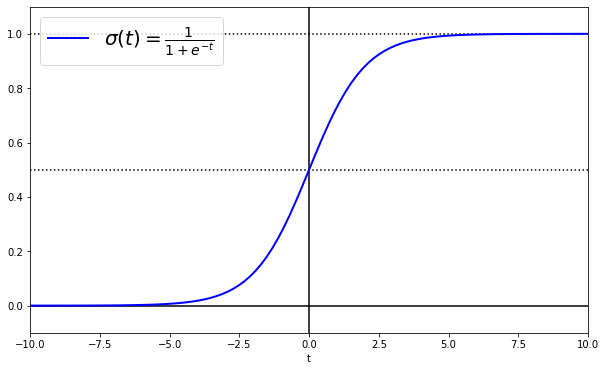

In [ ]:
#@title
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(10, 6))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()



Notice that if $t$ is large, then $\sigma(t) \approx \frac{1}{1+0}=1$, and conversely, if $t$ is small, then $\sigma(t) \approx \frac{1}{1+\infty}=0$ (see figure).

Once the logistic regression model has estimated the probability $\hat{p}$ that an instance $\boldsymbol{x}$ belongs to the positive class, it can make its prediction $\hat{y}$ easily.

$$
   \hat{y}  = \begin{cases}
               0 & \text{if } \hat{p} < 0.5\\
               1 & \text{if } \hat{p} \geq 0.5
          \end{cases}
$$

**Interpretation**: The *Odds* are defined as the probability that the event will occur divided by the probability that the event will not occur. If the probability of success is $P$, then the odds of that event is: $\text{odds} = \frac{P}{1-P}$. We can use a linear regression model to predict the log of the odds (*logit* function), this is, $\text{logit}(P)=ln(\frac{P}{1-P}) = \boldsymbol{\theta^T}\boldsymbol{x} \implies \frac{P}{1-P} = e^{\boldsymbol{\theta^T}\boldsymbol{x}} \implies P = \frac{e^{\boldsymbol{\theta^T}\boldsymbol{x}}}{1+e^{\boldsymbol{\theta^T}\boldsymbol{x}}}=\frac{1}{1+e^{-\boldsymbol{\theta^T}\boldsymbol{x}}} = \sigma(\boldsymbol{\theta^T}\boldsymbol{x})$

## Training and cost function <a name="2.2"></a>

The objective of the training process is to set the parameter vector $\boldsymbol{\theta}$ so that the **model estimates high probabilities for positive instances** ($y =
1$) and **low probabilities for negative instances** ($y = 0$).

Linear regression uses the MSE as loss function that gives a convex graph and then we can complete the optimization by finding its global minimum. However, it’s not an option for logistic regression since the hypothesis is changed, the MSE will result in a non-convex graph with local minimums so gradient descent may not find a global optimum.

![texto alternativo](https://i.ibb.co/qJq6h4L/local-minima.png)

Following how we saw least squares regression could be derived as the maximum likelihood estimator under a set of assumptions, let’s endow our classification model with a set of **probabilistic assumptions**, and then **fit the parameters via maximum likelihood**.

We can assume a *Binomial* probability distribution for the target variable, where each sample is one outcome of a Bernoulli trial. Then

\begin{cases}
P(y=1|\boldsymbol{x};\boldsymbol{\theta})=h_{\boldsymbol{\theta}}(\boldsymbol{x})=\hat{p}\\\\
P(y=0|\boldsymbol{x};\boldsymbol{\theta})=1-h_{\boldsymbol{\theta}}(\boldsymbol{x})=1-\hat{p}
\end{cases}

We can write this equation more compactly as

$$p(y|\boldsymbol{x};\boldsymbol{\theta})=(\hat{p})^y(1-\hat{p})^{1-y}$$

Assuming that the $m$ training examples were generated independently, we can then write the likelihood of the parameters as

$$L(\boldsymbol{\theta})=p(\boldsymbol{y}|\boldsymbol{X};\boldsymbol{\theta})=\prod_{i=1}^{m}p(y^{(i)}|\boldsymbol{x}^{(i)};\boldsymbol{\theta})=\prod_{i=1}^{m}(\hat{p}^{(i)})^{y^{(i)}}(1-\hat{p}^{(i)})^{1-y^{(i)}}$$

It will be easier to maximize the log likelihood:

$$\text{log}L(\boldsymbol{\theta})=\sum_{i=1}^{m}y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})$$

There is no a closed-form solution to this equation similar to the normal equation in linear regression. Instead we need to use an iterative algorithm such as Gradient Ascent. We could instead use Gradient descent to mimimize $-\text{log}L(\boldsymbol{\theta})$. We can write the cost function to minimize as

$$J(\boldsymbol{\theta})= -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})$$

That is, this cost function, usually called **binary cross-entropy loss** or **log loss** or **logistic regression loss**, is computed over the whole training set by simply averaging the cost over all training instances.

$$J(\boldsymbol{\theta})=\frac{1}{m}\sum_{i=1}^{m}c(h_{\boldsymbol{\theta}}(\boldsymbol{x}^{(i)}),y^{(i)})$$

where the log loss per sample is

$$c(h_{\boldsymbol{\theta}}(\boldsymbol{x}),y)=-(ylog(\hat{p})+(1-y)log(1-\hat{p}))$$


or equivalently

$$
   c(h_{\boldsymbol{\theta}}(\boldsymbol{x}),y)  = \begin{cases}
               -log(\hat{p}) & \text{if } y = 1\\
               -log(1-\hat{p}) & \text{if } y=0
          \end{cases}
$$

This loss function makes sense:
-  $-log(t)$ grows very large when $t$ approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. 
- On the other hand, $-log(t)$ is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative
instance or close to 1 for a positive instance, which is precisely what we want.



As we said, there is **no analytical solution** to compute the value of $\boldsymbol{\theta}$ that minimizes this cost function (there is no equivalent of the Normal Equation). But this **cost function is convex**, so Gradient Descent (explained [here](https://github.com/victorviro/ML_algorithms_python/blob/master/Introduction_gradient_descent_algorithm.ipynb)) or any other optimization algorithm (such as [Newton–Raphson method](https://en.wikipedia.org/wiki/Newton%27s_method)) is guaranteed to find the global minimum. The partial derivatives of the cost function with regards to the parameter $\theta_j$, $\frac{\partial J(\boldsymbol{\theta})}{\partial\theta_j}$, can be easily computed. Once we have the gradient vector containing all the partial derivatives we can use it in the Batch Gradient Descent algorithm.



## Example <a name="2.3"></a>

Let’s use the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal width feature. First, let’s load the data:

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


Now let’s train a Logistic Regression model:

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm.

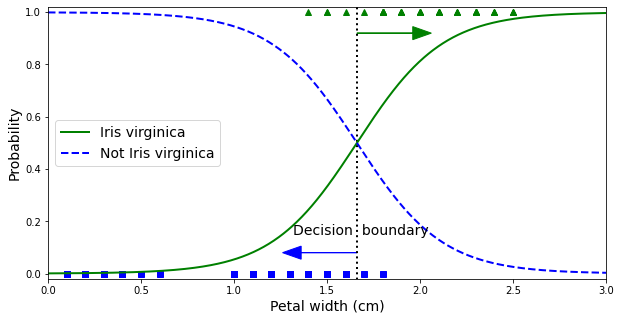

In [ ]:
#@title
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(10, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()



The petal width of Iris-Virginica flowers ranges from 1.4 cm to 2.5 cm, while the other iris flowers (not Iris-Virginica) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris-Virginica (it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class). In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the `predict()` method rather than the `predict_proba()` method), it will return whichever class is the most likely. Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-Virginica, or else it will predict that it is not (even if it is not very confident):



In [ ]:
print(decision_boundary)

[1.66066066]


In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

The next figure shows the same dataset but this time displaying two features: petal width and length. Once trained, the Logistic Regression classifier can estimate the probability that a new flower is an Iris-Virginica based on these two features. 

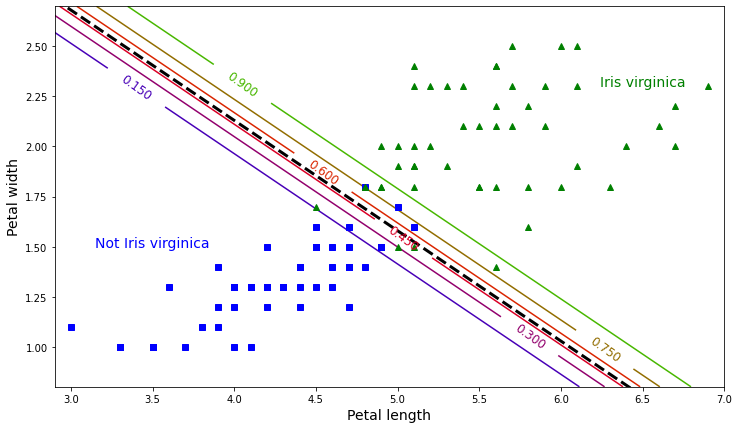

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(12, 7))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary. Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris-Virginica according to the model.



## Regularization <a name="2.4"></a>

Just like the other linear models, **logistic regression** models **can be regularized using $l_1$ or $l_2$ penalties**. Scitkit-Learn actually adds an $l_2$ penalty by default. The hyperparameter controlling the regularization strength of a Scikit-Learn `LogisticRegression` model is not alpha (as in other
linear models), but its inverse: `C` . The **higher the value of `C`, the less the model is regularized**.

# Multinomial logistic regression <a name="3"></a>



The logistic regression model can be generalized to support **multiple classes** directly. This is called **Softmax Regression**, or **Multinomial Logistic Regression**. Now the response variable $y$ can take on any one of $k$ values, so $y \in \{1,2,...,k\}$. The **response variable** is still discrete, but **can now take on more than two values**. We will thus model it as distributed according to a [multinomial distribution](https://en.wikipedia.org/wiki/Multinomial_distribution).

## Estimating probabilities <a name="3.1"></a>

The idea is quite simple: when **given an instance** $\boldsymbol{x}$, the softmax regression model **first computes a score** $s_{k}(\boldsymbol{x})$ **for each class $k$, then estimates the probability of each class by applying the softmax function to the scores**. The equation to compute $s_{k}(\boldsymbol{x})$ is just like the equation for linear regression prediction.

$$s_{k}(\boldsymbol{x})=\boldsymbol{x}^T\boldsymbol{\theta}^{(k)}$$

Each class has its own dedicated parameter vector $\boldsymbol{\theta}^{(k)}$ . All these vectors are usually stored as rows in a parameter matrix $\boldsymbol{\Theta}$.

Once you have computed the score of every class for the instance $\boldsymbol{x}$, you can estimate the probability $\hat{p}_k$ that the instance belongs to class $k$ by running the scores through the softmax function:

$$\hat{p}_k=\sigma(\boldsymbol{s}(\boldsymbol{x}))_{k}=\frac{e^{s_{k}(\boldsymbol{x})}}{\sum_{j=1}^{K}e^{s_{j}(\boldsymbol{x})}}$$

The softmax function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The **scores** are generally called **logits** or log-odds (although they are actually unnormalized log-odds).

- $K$ is the number of classes.
- $\boldsymbol{s}(\boldsymbol{x})$ is a vector containing the scores of each class for the instance $\boldsymbol{x}$.

- $\hat{p}_k=\sigma(\boldsymbol{s}(\boldsymbol{x}))_{k}$ is the estimated probability that the instance $\boldsymbol{x}$ belongs to class $k$ given the scores of each class for that instance.


Just like the Logistic Regression classifier, the Softmax Regression classifier **predicts the class with the highest estimated probability** (which is simply the class with the highest score).

$$\hat{y}=\text{arg}\max\limits_{k}\sigma(\boldsymbol{s}(\boldsymbol{x}))_{k}=\text{arg}\max\limits_{k}s_{k}(\boldsymbol{x})=\text{arg}\max\limits_{k}((\boldsymbol{\theta}^{(k)})^T \boldsymbol{x})$$

- The *argmax* operator returns the value of a variable that maximizes a function. In this equation, it returns the value of $k$ that maximizes the estimated probability $\sigma(\boldsymbol{s}(\boldsymbol{x}))_{k}$.

**Note**: The Softmax Regression classifier predicts only one class at a time
(i.e., **it is multiclass, not multioutput**) so it should be used only with
mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple objects in one picture.

## Training and cost function <a name="3.2"></a>

The objective is to have a model that **estimates a high probability for the target class (and consequently a low probability for the other classes)**. Minimizing the cost function called the **cross-entropy** or categorical cross-entropy, should lead to this objective because it penalizes the model when it estimates
a low probability for a target class. 

$$J(\boldsymbol{\Theta})= -\frac{1}{m}\sum_{i=1}^{m} \sum_{k=1}^{K} y^{(i)}_klog(\hat{p}_k^{(i)})$$

- $y^{(i)}_k$ is the target probability that the $i^{\text{th}}$ instance belongs to class $k$. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.

Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes.

Notice that **when there are just two classes** ($K = 2$), this cost function is **equivalent to** the logistic regression’s cost function (**binary cross-entropy** loss).

The gradient vector of this cost function with regards to $\boldsymbol{\theta}^{(k)}$, $\nabla_{\boldsymbol{\theta}^{(k)}}J(\boldsymbol{\Theta})$, can be easily calculated. We can compute the gradient vector for every class, then use Gradient Descent (or any other optimization algorithm) to find the parameter matrix $\boldsymbol{\Theta}$ that minimizes the cost function.

**Note**: Cross entropy was originated from information theory. Suppose you want to efficiently transmit information about the weather every day. If there are eight options (sunny, rainy, etc.), you could encode each option using 3 bits since $2^3 = 8$. However, if you think it will be sunny almost every day, it would be much more efficient to code “sunny” on just one bit (0) and the other seven options on 4 bits (starting with a 1). Cross entropy measures the average number of bits you actually send per option. If your assumption about the weather is perfect, cross-entropy will just be equal to the entropy of the weather itself (i.e., its intrinsic unpredictability). But if your assumptions are wrong (e.g., if it rains often), cross-entropy will be greater by an amount called the [K–L divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence). The cross-entropy between two probability distributions $p$ and $q$ is defined as $H(p,q)=-\sum_{x}p(x)log(q(x))$ (at least when the distributions are discrete). For more details, check out this [video](https://www.youtube.com/watch?v=ErfnhcEV1O8).






### Parameter fitting <a name="3.2.1"></a>

The model assumes that the response variable is distributed according to a multinomial distribution, and the conditional distribution of $y$ given $\boldsymbol{x}$ is given by

$$p(y=k|\boldsymbol{x};\boldsymbol{\Theta})=\hat{p}_k=\frac{e^{s_{k}(\boldsymbol{x})}}{\sum_{j=1}^{K}e^{s_{j}(\boldsymbol{x})}}=\frac{e^{\boldsymbol{\theta}^{(k)T} \boldsymbol{x}}}{\sum_{j=1}^{K}e^{\boldsymbol{\theta}^{(j)T} \boldsymbol{x}}}$$

Similar to our original derivation of ordinary least squares and logistic regression, we have a training set of $m$ examples $\{(\boldsymbol{x}^{(i)}, y^{(i)});i= 1,...,m\}$ and would like to learn the parameters.

Assuming that the $m$ training examples were generated independently, we can then write the likelihood of the parameters as

$$L(\boldsymbol{\Theta})=p(\boldsymbol{y}|\boldsymbol{X};\boldsymbol{\Theta})=\prod_{i=1}^{m}p(y^{(i)}|\boldsymbol{x}^{(i)};\boldsymbol{\Theta})=\prod_{i=1}^{m} \prod_{k=1}^{K}(\hat{p}_k^{(i)})^{y_k^{(i)}}$$

writing the log-likelihood

$$\text{log}L(\boldsymbol{\Theta})=\sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \text{log}(\hat{p}_k^{(i)})$$

Finally, dividing by the number of instances and changing the sign we obtain the categorical cross entropy loss:

$$J(\boldsymbol{\Theta})= -\frac{1}{m}\sum_{i=1}^{m} \sum_{k=1}^{K} y^{(i)}_klog(\hat{p}_k^{(i)})$$

We can now obtain the maximum likelihood estimate of the parameters by maximizing $\text{log}L(\boldsymbol{\Theta})$ in terms of $\boldsymbol{\Theta}$ (or minimizing the cost function), using a method such as gradient ascent/descent or Newton’s method.

## Example <a name="3.3"></a>

Let’s use Softmax Regression to classify the iris flowers into all three classes using two features (petal lenght and petal width). Scikit-Learn’s `LogisticRegression` uses one-versus-all by default when you train it on more than two classes, but you can set the `multi_class` hyperparameter to `"multinomial"` to switch it to Softmax Regression instead. You must also specify a solver that supports Softmax Regression, such as the `"lbfgs"` solver (see Scikit-Learn’s documentation for more details). It also applies $l_2$ regularization by default, which you can control using the hyperparameter `C`.

In [ ]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

If we find an iris with 5 cm long and 2 cm wide petals, we can ask
our model to tell you what type of iris it is

In [ ]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


The model answers Iris-Virginica (class 2) with 94.2% probability (or Iris-Versicolor with 5.8% probability).

The next figure shows the resulting decision boundaries, represented by the background colors.

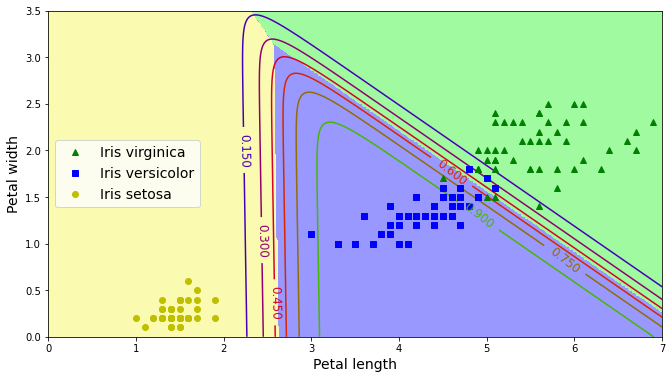

In [ ]:
#@title
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(11, 6))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()




Notice that the decision boundaries between any two classes are linear. The
figure also shows the probabilities for the Iris-Versicolor class, represented by the curved lines (e.g., the line labeled with 0.450 represents the 45% probability boundary). Notice that the model can predict a class that has an estimated probability below 50%. For example, at the point where all decision boundaries meet, all classes have an equal estimated probability of 33%.

# References <a name="4"></a>


- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

- [Github: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb)

- [Log loss in Scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#log-loss)

- [Logistic regression in Scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)


